<center>
    <h2>Project 5: <em>Making Friends</em></h2><br>
    <h3>Prof. Hollister</h3><br>
    <h4>by Rinat Ibragimov</h4></center>

### Introduction

### Set-up

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import names
from matplotlib.animation import FuncAnimation

In [14]:
fig = plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

In [11]:
class Node():
    
    def __init__(self, node_id: int, name=None):
        self.id = node_id
        # Specify a name or use 'names' library to generate a random last name
        self.name = name if name is not None else names.get_last_name()
        
    def __str__(self):
        return self.name

In [70]:
class FriendNetwork():
    
    def __init__(self, 
                 n_nodes: int,
                 padd: float = 0.5, 
                 prem: float = 0.25):
        
        self.net = nx.Graph()
        self.padd = padd
        self.prem = prem
        
        self.people = set(Node(i) for i in range(n_nodes))
        self.net.add_nodes_from(self.people)
        
        # set of all friendships
        self.friendships = set()
        # dictionary of {node-pair : number of mutual friends}; used to evaluate friendship formation
        self.mutuals = dict()
        # set to keep track of edges to add
        self.add_friendships = set()
        # set to keep track of edges to remove 
        self.rem_friendships = set()
        
    def get_person(self, node_id: int = -1, name: str = None) -> Node:
        """
        Get a node either by its @node_id or by its @name
        """
        if isinstance(node_id, int) and (node_id >= 0):
            for p in self.people:
                if p.id==node_id:
                    return p
        
        if name is not None:
            for p in self.people:
                if str(p)==name:
                    return p
        
        return None
    
    def set_friendships(self, friendships):
        if not isinstance(friendships, set):
            relations = set(friendships)
            
        self.friendships = friendships
    
    def are_friends(self, a, b):
        print(str(a), str(b))
        return b in self.net[a]
    
    def get_friends(self, a):
        return self.net[a]
    
    def get_mutual_friends(self, a, b):
        f_self = set(self.get_friends(a))
        f_other = set(self.get_friends(b))
        
        return f_self.intersection(f_other)
    
    def get_all_mutual_relations(self):
        for person in self.people:
            for other in self.people:
                if person is other:
                    continue
                    
                mutuals = self.get_mutual_friends(person, other)
                if len(mutuals) > 0:
                    self.mutuals[frozenset((person, other))] = len(mutuals)
    
    def add_friendship(self, a, b):
        # account for other equivalent permutation
        if (b,a) not in self.friendships:
            self.friendships.add((a,b))
        
    def rem_friendship(self, a, b):
        self.rem_friendships.add((a,b))
        
        # account for both equivalent permutations
        self.friendships.remove((a,b))
        self.friendships.remove((b,a))
        
    def set_random_friendships(self, p: float = 0.3):
        """
        Populate the graph with random edges with probability @p
        NOTE: removes existing relations
        """
        # clear existing relations
        self.friendships.clear()
        
        for person in self.people:
            for other in self.people:
                # no forming relations with yourself
                if person is other:
                    continue
                
                if np.random.random() < p:
                    self.friendships.add((person, other))
                    
    def evolve_relations(self):
        """
        Two-step process: 
        - go through each node pair that has mutual friends and see if a friendship is formed
        - then go through each friendship and see if it needs to be removed
        """
        for people, num_mutual in self.mutuals.items():
            p = 1 - (1 - padd)^num_mutual
            if np.random.random() < p:
                # *people expands the tuple into 2 separate arguments
                self.add_friendship(*people)
                
        for people, num_mutual in self.mutuals.items():
            p = 1 - (1 - padd)^num_mutual
            if np.random.random() < p:
                # *people expands the tuple into 2 separate arguments
                self.add_friendship(*people)
        
        # relationships updated; clear
        self.mutuals.clear()
    
    def update_graph(self):
        """
        Update the network's edges
        """
        # clear matplotlib figure
        fig.clear()
        # remove edges marked as lost friendships (in self.rem_friendships)
        self.net.remove_edges_from(self.rem_friendships)
        # network updated, clear the holder
        self.rem_friendships.clear()
        
        #
        # TODO: >>>>> SEE IF NECESSARY <<<<<<
        #
#         self.net.add_edges_from(self.friendships)
    
    def draw(self):
        self.update_graph()
        nx.draw(self.net, node_color='y', with_labels=True)

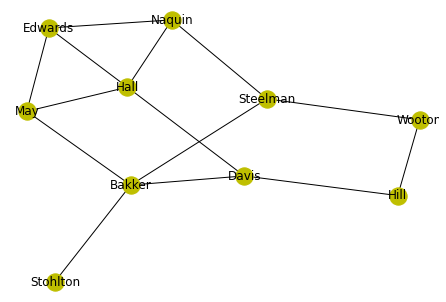

In [53]:
net = FriendNetwork(10, 4)
net.set_random_friendships(0.1)
net.draw()

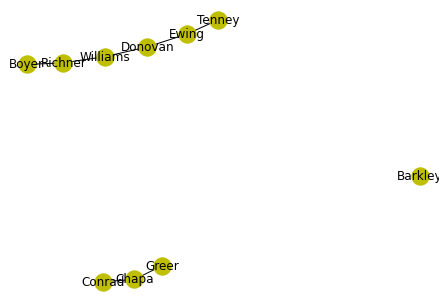

In [50]:
net.add_relation(a, b)
net.draw()

In [67]:
x1 = frozenset((a,b))
x2 = frozenset((b,a))

In [68]:
z = {x1, x2}
z

{frozenset({<__main__.Node at 0x7fe0e1cd6160>,
            <__main__.Node at 0x7fe0e1e7d7c0>})}

In [64]:
len(z)

2

### Analysis

### References

<ul>
    <li>Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008
    </ul>